In [1]:
# Getting access to course material from specific folder - change to correct folder!

import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

# working with arrays
import numpy as np

# plotting functionality
import matplotlib.pyplot as plt

# typehints
from typing import Tuple

"""
Own packages
"""

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Introduction to linear algebra and the Numpy package

Linear algebra deals with system of linear equations, matrices, determinants, vectors, linear transformations, etc. It is an invaluable tool for the financial economist! 

Linear algebra will help us simplify a range of calculations in finance. Examples include the linear regression estimator, conditions for optimality for functions of several variables and portfolio construction. 

__Example: Portfolio construction__

Assume that we want to calculate the expected value and variance of the return on a portfolio of 5 stocks. We can represent the expected value and covariance of the individual stock returns as respectively

$$
\boldsymbol{\mu} = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_5 \end{bmatrix}
$$

and 

$$
\boldsymbol{\Sigma} = \begin{bmatrix} \sigma_{11} & \sigma_{12} & \dots & \sigma_{15} \\ 
\sigma_{21} & \sigma_{22} & \dots & \sigma_{25} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{51} & \sigma_{52} & \dots & \sigma_{55}
\end{bmatrix}
$$

Let $\mathbf{w}$ denote the portfolio weights 

$$
\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_5 \end{bmatrix}
$$

Not using matrix notation will give us the following formulas the expected portfolio return, $\mu_p$,  and portfolio variance $\sigma_p^2$

$$
\mu_p = \sum_{i=1}^5 w_i \mu_i
$$

and 

$$
\sigma_p^2 = \sum_{i=1}^5 \sum_{j=1}^5  w_i w_j \sigma_{ij}
$$

These formulas are cumbersome to work with!

Luckily, matrix notation allows to use 

$$
\mu_p = \mathbf{w}^\top \boldsymbol{\mu} =  \begin{bmatrix} w_1 & w_2 & \dots & w_5 \end{bmatrix} \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_5 \end{bmatrix}
$$

and 

$$
\sigma_p^2 = \mathbf{w}^\top \boldsymbol{\Sigma}  \mathbf{w} =  \begin{bmatrix} w_1 & w_2 & \dots & w_5 \end{bmatrix} \begin{bmatrix} \sigma_{11} & \sigma_{12} & \dots & \sigma_{15} \\ 
\sigma_{21} & \sigma_{22} & \dots & \sigma_{25} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{51} & \sigma_{52} & \dots & \sigma_{55}
\end{bmatrix}  \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_5 \end{bmatrix}    
$$

which are much easier to work with. 

## Vector and matrix notation 

A $m \times n$ matrix, say $\mathbf{A}$,  is an array of numbers

$$
\mathbf{A} = \begin{bmatrix} 
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \dots & a_{mn} 
\end{bmatrix} 
$$

A matrix with only one row is called a <mark>row vector</mark>

$$
\begin{bmatrix} 
a_{1} & a_{2} & \dots & a_{n} 
\end{bmatrix} 
$$

A matrix with only one column is called a <mark>column vector</mark>

$$
\begin{bmatrix} 
a_{1} \\ a_{2} \\ \vdots \\ a_{n} 
\end{bmatrix} 
$$

## Vector and matrices in Python

In Python, we can use the `numpy` package to work with matrices and vectors. To that end, we need to import numpy into our Jupyter notebook using

```python 
import numpy as np 
```

The imported package `numpy` with the alias `np` contains a number of methods that allow us to define vector and matrices and apply linear algebra operations. 

The Numpy documentation can be found [here](https://numpy.org/doc/stable/index.html).

For example, we can define the matrix 

$$
\mathbf{A} = \begin{bmatrix} 
4  & 3 \\
2  & 1  
\end{bmatrix} 
$$

In [2]:
# import numpy as np

A = np.array([[4, 3],
              [2, 1]])

print(A)

[[4 3]
 [2 1]]


A `numpy` array is an object that with a number of attributes and methods (see [here](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods) for a complete list) . 

In [3]:
A.shape

(2, 2)

In [4]:
# calculate mean over all rows and columns
A.mean()

np.float64(2.5)

In [5]:
# calculate mean for each column
A.mean(axis=0)

array([3., 2.])

In [6]:
# calculate mean for each row
A.mean(axis=1)

array([3.5, 1.5])

In [7]:
# we can get an element from a matrix using e.g.
#  note "zero-indexing"
A[0, 0]

np.int64(4)

# Matrix operations

## Matrix addition

Assume that  $\mathbf{A}$ and $\mathbf{B}$ are two matrices of the same order, $m \times n$. Then, the matrix sum is given by 

$$
\mathbf{A} + \mathbf{B} = \begin{bmatrix} 
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \dots & a_{mn} 
\end{bmatrix}  + \begin{bmatrix} 
b_{11} & b_{12} & \dots & b_{1n} \\
b_{21} & b_{22} & \dots & b_{2n} \\
\vdots & \vdots & & \vdots\\
b_{m1} & a_{m2} & \dots & b_{mn} 
\end{bmatrix}  = \begin{bmatrix} 
a_{11} + b_{11} & a_{12} + b_{12} & \dots & a_{1n} + b_{1n} \\
a_{21} + b_{21}  & a_{22} +  b_{22} & \dots & a_{2n} + b_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} + b_{m1} & a_{m2} + b_{m2} & \dots & a_{mn} + b_{mn}
\end{bmatrix} 
$$

Matrix addition is straight forward in Python

In [8]:
A = np.array([[4, 3],
              [2, 1]])

B = np.array([[1, 1],
              [1, 1]])

C = A + B

print(C)

[[5 4]
 [3 2]]


## Multiplication with a scalar

Assume that $\mathbf{A}$ is a matrix of order $m \times n$ and that $\alpha$ is a scalar (a real number). Then, 

$$
\alpha \mathbf{A} = \alpha \begin{bmatrix} 
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \dots & a_{mn} 
\end{bmatrix} = \begin{bmatrix} 
\alpha a_{11} & \alpha  a_{12} & \dots & \alpha  a_{1n} \\
\alpha  a_{21} & \alpha  a_{22} & \dots & \alpha  a_{2n} \\
\vdots & \vdots & & \vdots\\
\alpha  a_{m1} & \alpha  a_{m2} & \dots & \alpha  a_{mn} 
\end{bmatrix}
$$

In Python, we can just use the `*` operator

In [9]:
alpha = 5

A = np.array([[4, 3],
              [2, 1]])

B = alpha * A

print(B)

[[20 15]
 [10  5]]


### Rules for scalar multiplication

Let  $\mathbf{A}, \mathbf{B}$, and $\mathbf{C}$ be arbitrary $m \times n $ matrices, and let $\alpha$ and $\beta$ be real numbers. Also, let $\mathbf{0}$ denote the $m \times n$ matrix consisting only of zeros, called the zero matrix. Then

* $(\mathbf{A} + \mathbf{B}) + \mathbf{C} = \mathbf{A} + (\mathbf{B} + \mathbf{C})$
* $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$
* $\mathbf{A} + \mathbf{0} = \mathbf{A}$
* $\mathbf{A} + (-\mathbf{A}) = \mathbf{0} $
* $(\alpha + \beta)\mathbf{A} = \alpha \mathbf{A} + \beta \mathbf{A}$
* $\alpha(\mathbf{A}+\mathbf{B}) = \alpha \mathbf{A} + \alpha \mathbf{B}$

## Matrix multiplication

Let $\mathbf{A}$ have the order $m \times n$ and $\mathbf{B}$ have the order $n \times p$, then the product $\mathbf{C} = \mathbf{A}\mathbf{B}$ is $m \times p$ matrix $\mathbf{C}$ whose element in $i$'th row and the $j$'th column is the inner product 

$$
c_{ij} = \sum_{r=1}^n a_{ir}b_{rj} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + + a_{in}b_{nj}
$$

of the $i$'th row of $\mathbf{A}$ and the $j$'th column of $\mathbf{B}$

__Example__

Let 

<center>
$\mathbf{A} = \begin{bmatrix} 
4  & 3 \\
2  & 1  
\end{bmatrix}$, $\;$     $\mathbf{B} = \begin{bmatrix} 
1  & 3 \\
2  & 5  
\end{bmatrix}$
</center>

then the matrix product is

$$
\mathbf{A}\mathbf{B} = \begin{bmatrix} 
4\cdot1+ 3\cdot 2  & 4 \cdot 3 + 3 \cdot 5 \\
2\cdot 1+ 1\cdot 2  & 2 \cdot 3 + 1 \cdot 5
\end{bmatrix} = \begin{bmatrix} 
10  & 27 \\
4 & 11
\end{bmatrix}
$$

In Python, we can use the function `np.matmul` or the `@` operator

In [10]:
A = np.array([[4, 3],
              [2, 1]])

B = np.array([[1, 3],
              [2, 5]])

C = np.matmul(A,B) 
# or C = A@B

print(C)

[[10 27]
 [ 4 11]]


Note that using the `*` operator will not result in the matrix product! It will return the [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)), the element-wise product, which is only defined for matrices of the same dimensions.

In [11]:
C = A*B
# C = np.multiply(A,B) 

print(C)

[[4 9]
 [4 5]]


### Rules for matrix multiplication

If $\mathbf{A}, \mathbf{B}$, and $\mathbf{C}$ are matrices whose dimensions are such that the specified multiplication operations are defined, and if $\alpha$ is an arbitrary scalar, then: 

$$
\begin{eqnarray}
(\mathbf{A}\mathbf{B})\mathbf{C} &=&\mathbf{A} (\mathbf{B}\mathbf{C}) \nonumber \\
\mathbf{A}(\mathbf{B} +\mathbf{C}) &=&\mathbf{A} \mathbf{B} + \mathbf{A}\mathbf{C} \nonumber \\
(\mathbf{A}+\mathbf{B})\mathbf{C} &=&\mathbf{A}\mathbf{C} + \mathbf{B}\mathbf{C} \nonumber \\
(\alpha \mathbf{A})\mathbf{B} &=& \mathbf{A} (\alpha \mathbf{B}) = \alpha(\mathbf{A}\mathbf{B}) \nonumber \\
\end{eqnarray}
$$

# Some important matrices

## The identity matrix 

The <mark>identity matrix</mark> of order $n$, denoted by $\mathbf{I}$, is the $n\times n$ matrix having entries $1$ along the main diagonal and $0$ elsewhere

$$
\mathbf{I}_n = \begin{bmatrix}
1 & 0 & \dots & 0 \\
0 & 1 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & 1
\end{bmatrix}
$$


The identity matrix has the property that if $\mathbf{A}$ is $n \times m$ matrix, then $\mathbf{A}\mathbf{I}_n = \mathbf{A}$

The identity matrix has the property that if $\mathbf{B}$ is $m \times n$ matrix, then $\mathbf{I}_n \mathbf{B} = \mathbf{B}$

The identity matrix has the property that if $\mathbf{C}$ is $n \times n$ matrix, then $\mathbf{I}_n \mathbf{C} = \mathbf{C}\mathbf{I}_n = \mathbf{C}$


In  Python, we can define the $2 \times 2$ identity matrix as follows

In [12]:
I = np.eye(2)

print(I)

A = np.array([[4, 3],
              [2, 1]])

print('\n')
print(A@I)

[[1. 0.]
 [0. 1.]]


[[4. 3.]
 [2. 1.]]


## The transpose

Consider the $m\times n$ matrix $\mathbf{A}$. We denote the <mark>transpose</mark> of $\mathbf{A}$ by $\mathbf{A}^\prime$ or $\mathbf{A}^\top$, which is defined as the $n \times m$ matrix whose first columns is the first row of $\mathbf{A}$, and so on.

Thus,

$$
\mathbf{A} = \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &  \ddots& \vdots\\
a_{m1} & a_{m2} & \dots & a_{mn} 
\end{bmatrix} \implies
\mathbf{A}^\top = \begin{bmatrix}
a_{11} & a_{21} & \dots & a_{m1} \\
a_{12} & a_{22} & \dots & a_{m2} \\
\vdots & \vdots & \ddots & \vdots\\
a_{1n} & a_{2n} & \dots & a_{mn} 
\end{bmatrix}
$$

In Python, we can use the following

In [13]:
A = np.array([[4, 3],
              [2, 1]])

B = np.transpose(A)
# or B = A.T

print(B)

[[4 2]
 [3 1]]


### Rules for transposition

Given matrices $\mathbf{A}$ and $\mathbf{B}$ suitable for the following operations, and given any scalar $\alpha$: 

$$
\begin{eqnarray}
(\mathbf{A}^\top)^\top &=& \mathbf{A} \nonumber  \\
(\mathbf{A} + \mathbf{B})^\top &=& \mathbf{A}^\top + \mathbf{B}^\top  \nonumber \\
(\alpha \mathbf{A})^\top &=& \alpha \mathbf{A}^\top \nonumber  \\
(\mathbf{A}\mathbf{B})^\top &=& \mathbf{B}^\top \mathbf{A}^\top  \nonumber \\
\end{eqnarray}
$$

## Symmetric matrices

A square matrix, say $A$ with order $n \times n$, with the property that it is symmetric about the main diagonal is called <mark>symmetric</mark>, e.g. 

$$
\mathbf{A} = \begin{bmatrix}
2 & -1 & 5 \\
-1 & -3 & 2 \\
5 & 2  & 8\\
\end{bmatrix}
$$


A symmetric matrix is equal to its own transpose

<center>
The matrix $\mathbf{A}$ is symmetric $\Leftrightarrow \mathbf{A} = \mathbf{A}^\top$
</center>

In [14]:
A = np.array([[2, -1, 5], [-1, -3, 2], [5, 2, 8]])

print(A)

print('\n')

print(A.T)

[[ 2 -1  5]
 [-1 -3  2]
 [ 5  2  8]]


[[ 2 -1  5]
 [-1 -3  2]
 [ 5  2  8]]


## The inverse matrix

If we have a real number $\alpha \neq 0$, then we have $\alpha^{-1}$ such that

$$
\begin{equation*}
\alpha \alpha^{-1} =  \alpha^{-1}\alpha = 1
\end{equation*}
$$

$\alpha^{-1}$ is called the inverse of $\alpha$


Assume that $\mathbf{A}$ is a $n \times n$ matrix, then we say that $\mathbf{A}^{-1}$ is the inverse if 

$$
\begin{equation*}
\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}_n
\end{equation*}
$$

If  $\mathbf{A}$ has an inverse it is called <mark>invertible</mark>. 


We see that $\mathbf{A}$ must be the inverse of $\mathbf{A}^{-1}$ and that $\mathbf{A}^{-1}$ and $\mathbf{A}$ must be a square matrices of the same order

The function `numpy.linalg.inv` can be used to calculate the inverse, if defined. 

In [15]:
A = np.array([[5, 6], [6, 10]])

print(A)

Ainv = np.linalg.inv(A)

print('\n')
print(Ainv)

I = Ainv @ A

print('\n')
print(I)

[[ 5  6]
 [ 6 10]]


[[ 0.71428571 -0.42857143]
 [-0.42857143  0.35714286]]


[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


### Properties of the inverse

Let $\mathbf{A}$ and $\mathbf{B}$ be invertible $n \times n$ matrices. Then: 


$\mathbf{A}^{-1}$ is invertible, and $(\mathbf{A}^{-1})^{-1} = \mathbf{A}$


$\mathbf{AB}$ is invertible, and $(\mathbf{AB})^{-1} = \mathbf{B}^{-1}\mathbf{A}^{-1}$


The transpose $\mathbf{A}^\top$ is invertible $(\mathbf{A}^\top)^{-1} = (\mathbf{A}^{-1})^{\top}$


$(c\mathbf{A})^{-1} = c^{-1} \mathbf{A}^{-1}$ whenever $c$ is a number different from zero

### Using the inverse to solving system of linear equations

Provided that $\vert \mathbf{A} \vert \neq 0$, one has that the solution to 

$$
\begin{equation*}
\mathbf{A}\mathbf{x} = \mathbf{b}
\end{equation*}
$$
is given by 
$$
\begin{equation*}
\mathbf{x} = \mathbf{A}^{-1} \mathbf{b} 
\end{equation*}
$$

__Example__

Solve the following system of equations
$$
\begin{align*}
2x + y &= 3 \\
2x + 2y &= 4
\end{align*}
$$

We can write the system as 

$$
\mathbf{A}\mathbf{x} =
\begin{bmatrix} 
2 & 1 \\
2 & 2
\end{bmatrix} 
\begin{bmatrix} 
x \\
y
\end{bmatrix}
= \begin{bmatrix} 
3 \\
4
\end{bmatrix} = \mathbf{b}
$$

The inverse of $\mathbf{A}$ is given by

$$
\mathbf{A}^{-1} = \frac{1}{2\cdot 2 - 2 \cdot 1} \begin{bmatrix} 
2 & -1 \\
-2 & 2
\end{bmatrix} =  \begin{bmatrix} 
1 & -1/2 \\
-1 & 1
\end{bmatrix}
$$

Thus, the solution to the system of equations is given by 

$$
\mathbf{x} = \mathbf{A}^{-1} \mathbf{b} = \begin{bmatrix} 
1 & -1/2 \\
-1 & 1
\end{bmatrix} \begin{bmatrix} 
3 \\
4
\end{bmatrix} 
= \begin{bmatrix} 
3 - 2 \\
-3 + 4
\end{bmatrix} 
= \begin{bmatrix} 
1 \\
1
\end{bmatrix} 
$$

Using Python

In [16]:
A = np.array([[2, 1],
              [2, 2]])

b = np.array([3, 4])

A_inv = np.linalg.inv(A)

print("The solution is [x, y] = ")
print(A_inv@b)

The solution is [x, y] = 
[1. 1.]


# Some relevant methods

##  The determinant

In Python, `numpy.linalg.det` can be used to calculate the determinant of a matrix. Consider the matrix

$$
\mathbf{A} = \begin{bmatrix}
2 & 3 & 7 \\
8 & 4 & 5 \\
1 & 10 & 2 \\
\end{bmatrix}
$$

then

In [17]:
A = np.array([[2, 3, 7],
              [8, 4, 5], 
              [1, 10, 2]])

np.linalg.det(A)

np.float64(414.99999999999983)

### The relationship between the inverse and the determinant

The inverse will exist if and only if its determinant is different from zero

$$
\begin{equation*}
A^{-1} \text{ exists } \Leftrightarrow \vert \mathbf{A} \vert \neq 0
\end{equation*}
$$


A square matrix is <mark>singular</mark> if $\vert \mathbf{A} \vert = 0$

A square matrix is <mark>nonsingular</mark> if $\vert \mathbf{A} \vert \neq 0$

Thus, a matrix has an inverse if and only if it is non-singular


A matrix can only have one inverse

## The inner product

The <mark>inner product</mark> of the pair of $n$-vectors $\mathbf{a}=\begin{bmatrix} a_1 & ...  & a_n \end{bmatrix}^\top$ and $\mathbf{b}=\begin{bmatrix} b_1 & ...  & b_n \end{bmatrix}^\top$ is defined by

$$
\begin{equation*}
\mathbf{a}\cdot \mathbf{b} = \mathbf{a}^\top \mathbf{b} = a_1 b_1 + a_2 b_2 + ... + a_n b_n = \sum_{i=1}^n a_i b_i
\end{equation*}
$$

If $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$ are $n$-vectors and $\alpha$ is a scalar, then 

$$
\begin{align*}
\mathbf{a} \cdot \mathbf{b} & = \mathbf{b} \cdot \mathbf{a} \\
\mathbf{a} \cdot (\mathbf{b} + \mathbf{c}) & = \mathbf{a} \cdot \mathbf{b} + \mathbf{a} \cdot \mathbf{c} \\
(\alpha \mathbf{a})\cdot \mathbf{b} & = \mathbf{a} \cdot (\alpha  \mathbf{b} ) = \alpha( \mathbf{a}\cdot \mathbf{b})
\end{align*}
$$
and 

<center>
$\mathbf{a} \cdot \mathbf{a} > 0$  if and only if $\mathbf{a} \neq \mathbf{0}$
</center>

In Python, we can either use the `@` operator on two vectors or the function `numpy.inner` 

In [18]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 2, 4, 4])

np.inner(a, b)
# or a @ b

np.int64(34)

### Lenght of a vector

The <mark>length</mark> or <mark>norm</mark> of a vector $\mathbf{a}=\begin{bmatrix} a_1 & ...  & a_n \end{bmatrix}$ is denoted by $\vert \vert \mathbf{a} \vert \vert$ and defined as

$$
\begin{equation*}
\Vert \mathbf{a} \Vert = \sqrt{\mathbf{a} \cdot \mathbf{a}} = \sqrt{a_1^2 + ... + a_n^2}
\end{equation*}
$$

We see that this looks very similar to the formula for distance between two points in the $n$-dimensional space - the vector is the distance between $\begin{bmatrix} 0 & ...  & 0 \end{bmatrix}$ and the point $\begin{bmatrix} a_1 & ...  & a_n \end{bmatrix}$

The <mark>Cauchy-Schwarz inequality</mark> states that 

$$
\begin{equation*}
\vert \mathbf{a} \cdot \mathbf{b} \vert  \leq  \Vert \mathbf{a} \Vert  \cdot \Vert \mathbf{b} \Vert 
\end{equation*}
$$

In Python, we may use `numpy.linalg.norm` directly

In [19]:
a = np.array([1, 2, 3, 4])

np.linalg.norm(a)

np.float64(5.477225575051661)

### Orthogonality


Two vectors $\mathbf{a}$ and $\mathbf{b}$ are orthogonal if the angel between them is $90$ degrees. This can only be the case if the inner product of the vectors are zero:

$$
\begin{equation*}
\mathbf{a} \bot \mathbf{b} \Leftrightarrow \mathbf{a} \cdot \mathbf{b} = 0
\end{equation*}
$$

The concept of orthogonality is very important in econometrics where the orthogonality concept corresponds to the requirement that two variables are uncorrelated. E.g., we can define the ordinary least squares estimator using two orthogonality conditions. 

## The outer product

Given two vectors  $\mathbf{a}=\begin{bmatrix} a_0 & ...  & a_m \end{bmatrix}^\top$ and $\mathbf{b}=\begin{bmatrix} b_0 & ...  & b_n \end{bmatrix}^\top$, the outer product is given by 

\begin{equation}
\begin{bmatrix} a_0 b_0 & a_0 b_1& \dots & a_0 b_n \\
a_1 b_0 & a_1 b_1 & \dots & a_1 b_n \\
\vdots & \vdots &  \ddots& \vdots\\
a_m b_0 & a_m b_1 & \dots & a_m b_n \end{bmatrix}
\end{equation}

In Python, we can use the function `numpy.outer`

In [20]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 2, 4, 4])

np.outer(a, b)

array([[ 2,  2,  4,  4],
       [ 4,  4,  8,  8],
       [ 6,  6, 12, 12],
       [ 8,  8, 16, 16]])

## Extracting the diagonal and creating a diagonal matrix

In Python, we can extract the diagonal of a matrix using `numpy.diag` by applying the function on a 2-dim array

In [21]:
A = np.array([[2, 3, 7],
              [8, 4, 5], 
              [1, 10, 2]])

np.diag(A)
# or A.diagonal()

array([2, 4, 2])

If we apply `numpy.diag` on a 1-dim array, we obtain a diagonal matrix

In [22]:
B = np.diag(A)
np.diag(B)

array([[2, 0, 0],
       [0, 4, 0],
       [0, 0, 2]])

# Quadratic forms

If $\mathbf{A}$ is a square matrix of dimension $n$ and $\mathbf{x}$ is a n-dimensional vector, then we can write a <mark>quadratic form</mark> as 

$$
\mathbf{x}^\top \mathbf{A} \mathbf{x}
$$

For a general $2 \times 2$ matrix, we have

$$
\begin{bmatrix}
x_{1} & x_{2}  
\end{bmatrix} 
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\ x_{2}  
\end{bmatrix} = a_{11}x_1^2 + (a_{12} + a_{21})x_1 x_2 + a_{22}x_2^2
$$

Thus, quadratic terms of the variables. Without loss of generality, we may assume that $\mathbf{A}$ is a symmetric matrix. 


## Definiteness of a matrix

One important concept is the definiteness of a matrix which for instance is important when defining the second order conditions for optimization problems. 

The value of the quadratic form $\mathbf{x}^\top \mathbf{A} \mathbf{x}$ could be zero, positive or negative depending on the values of $\mathbf{x}$. 

We will however say that a square matrix $\mathbf{A}$ is 

* positive definite  if all quadratic forms $\mathbf{x}^\top \mathbf{A} \mathbf{x}>0$ for every non-zero vector $\mathbf{x}$
* positive semi-definite  if all quadratic forms $\mathbf{x}^\top \mathbf{A} \mathbf{x}\geq0$ for every non-zero vector $\mathbf{x}$
* negative definite  if all quadratic forms $\mathbf{x}^\top \mathbf{A} \mathbf{x}<0$ for every non-zero vector $\mathbf{x}$
* negative semi-definite  if all quadratic forms $\mathbf{x}^\top \mathbf{A} \mathbf{x}\leq0$ for every non-zero vector $\mathbf{x}$

One can show that a necessary condition for a matrix to be negative definite is that all diagonal elements are negative and opposite for a positive definite matrix. 

# Eigenvalues and eigenvectors

## Linear transformations

If we have a $m \times n$ matrix $\mathbf{A}$ and a $n$-dimensional vector $\mathbf{x}$, then the linear transformation 

$$
\mathbf{A}\mathbf{x}
$$

will be a $m$-dimensional vector. 

__Example__

Consider 
$$
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}, \; \mathbf{x} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

Then, 

$$
\mathbf{A}\mathbf{x} = \begin{bmatrix} 4 \\ 8 \end{bmatrix}
$$

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\johan\AppData\Local\Temp\ipykernel_23164\1997254688.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.text(x[0]*1.05,x[1]*1.05,"$\mathbf{x}$", horizontalalignment='center', fontsize=15);
C:\Users\johan\AppData\Local\Temp\ipykernel_23164\1997254688.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.text(Ax[0] + 0.05, Ax[1] + 0.15,"$\mathbf{A}\mathbf{x}$", horizontalalignment='center',


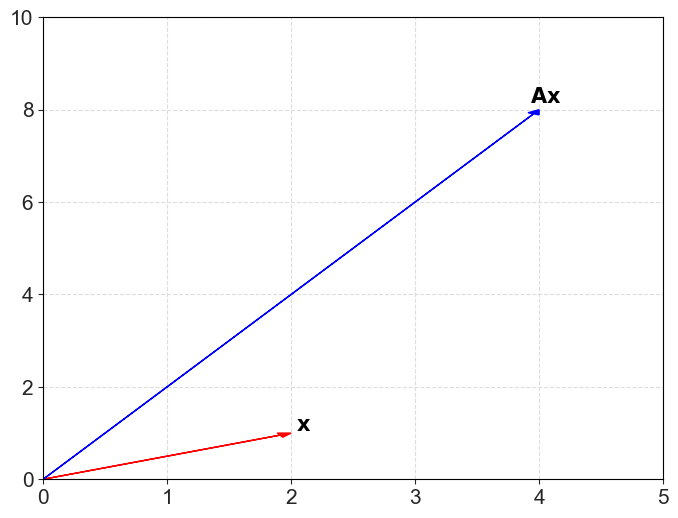

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

# x vector
x = np.array([2.0,1.0])

# A matrix
A = np.array([[1, 2], [2, 4]])

# end point 
Ax = A@x

ax.arrow(0, 0, x[0], x[1], head_width=0.1, head_length=0.1, fc='red', ec='red', length_includes_head=True)
ax.arrow(0, 0, Ax[0], Ax[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

# add some extra space
plt.xlim([0.0, 5])
plt.ylim([0.0, 10])

plt.text(x[0]*1.05,x[1]*1.05,"$\mathbf{x}$", horizontalalignment='center', fontsize=15);
plt.text(Ax[0] + 0.05, Ax[1] + 0.15,"$\mathbf{A}\mathbf{x}$", horizontalalignment='center',
         fontsize=15);

plt.grid(linestyle="--")
ax.set_axisbelow(True)

## Definition of eigenvector

The general definition of an eigenvector $\mathbf{w}$ of a square matrix $\mathbf{A}$ is any vector $\mathbf{w}$ such that 

$$
\mathbf{A}\mathbf{w} = \lambda \mathbf{w}
$$

for some constant $\lambda$, which is called the <mark>eigenvalue</mark> belonging to the <mark>eigenvector</mark> $\mathbf{w}$.

__Example__

The matrix


<center>
$\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}$ has eigenvectors  $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
</center>
with eigenvalues 3 and -1 respectively, because


<center>
$\begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = 3\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = -1\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
</center>

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\johan\AppData\Local\Temp\ipykernel_23164\3484504059.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.text(x[0]*1.05,x[1]*1.05,"$\mathbf{w}$", horizontalalignment='center', fontsize=15);
C:\Users\johan\AppData\Local\Temp\ipykernel_23164\3484504059.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.text(Ax[0] + 0.05, Ax[1] + 0.15,"$\mathbf{A}\mathbf{w}$", horizontalalignment='center',


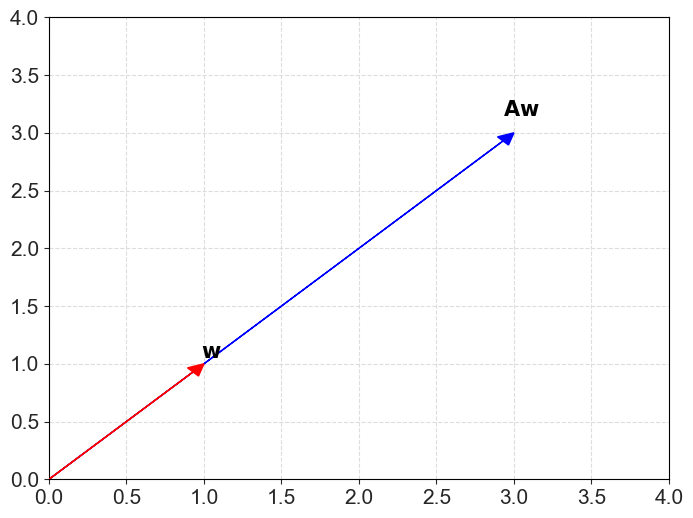

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

# x vector
x = np.array([1.0,1.0])

# A matrix
A = np.array([[1, 2], [2, 1]])

# end pont 
Ax = A@x

ax.arrow(0, 0, x[0], x[1], head_width=0.1, head_length=0.1, fc='red', ec='red', length_includes_head=True, zorder=10)
ax.arrow(0, 0, Ax[0], Ax[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

# add some extra space
plt.xlim([0.0, 4])
plt.ylim([0.0, 4])

plt.text(x[0]*1.05,x[1]*1.05,"$\mathbf{w}$", horizontalalignment='center', fontsize=15);
plt.text(Ax[0] + 0.05, Ax[1] + 0.15,"$\mathbf{A}\mathbf{w}$", horizontalalignment='center',
         fontsize=15);

plt.grid(linestyle="--")
ax.set_axisbelow(True)

A $n \times n$ matrix $\mathbf{A}$ will have exactly $n$ eigenvalues. Some may be zero or repeated. 

There will be infintely many eigenvectors. In fact, if $\mathbf{w}$ is an eigenvector, so is $k \mathbf{w}$ for any real number $k$. 

Often, we will return the normalized eigenvectors, label it $\mathbf{w}^*$, which we can obtain from any eigenvector $\mathbf{w}$ by dividing each element with the length of $\mathbf{w}$:


$$
\mathbf{w}^* = \frac{1}{\vert \vert \mathbf{w} \vert \vert}  \mathbf{w}
$$

where 

$$
\vert \vert \mathbf{w} \vert \vert = \sqrt{w_1^2 + ... + w_n^2} 
$$

## The characteristic equation

We may rewrite 

$$
\mathbf{A}\mathbf{w} = \lambda \mathbf{w}
$$

as 

$$
(\mathbf{A} - \lambda \mathbf{I}) \mathbf{w} = \mathbf{0}
$$

A non-zero solution $\mathbf{w}$ will only exist if $\mathbf{A} - \lambda \mathbf{I}$ is non invertible implying that 

$$
\det \left( \mathbf{A} - \lambda \mathbf{I} \right) = 0
$$

which is called the <mark>characteristic equation</mark>

__Example__

Find the eigenvalues and eigenvectors of the matrix

$$
\mathbf{A} = \begin{bmatrix} 2 & -1 \\ -2 & 3 \end{bmatrix}
$$

The characteristic equation is 

$$
\begin{vmatrix} 2 - \lambda & -1 \\ -2 & 3 -\lambda \end{vmatrix} = 0
$$

which corresponds to (just find the determinant)

$$
(2 - \lambda)(3-\lambda) - 2 = \lambda^2 - 5\lambda + 4 = 0
$$

We can just use a the general quadratic formula to find the roots

$$
\lambda = \frac{5 \pm \sqrt{25 - 16}}{2} \Rightarrow  \lambda = 1 \text{ or } \lambda = 4
$$

Then, we can find corresponding eigenvectors by 

$$
\begin{bmatrix} 2 & -1\\ -2 & 3 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = 1\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
$$

with the solution (we could normalize with the lenght $\sqrt{2}$)

$$
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

and 

$$
\begin{bmatrix} 2 & -1\\ -2 & 3 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = 4\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
$$

with the solution (we could normalize with the lenght $\sqrt{5}$)

$$
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \end{bmatrix}
$$

## Eigenvalues and eigenvectors in Python

In Python, we can simply use `numpy.linalg.eig` to get eigenvalues and eigenvectors

In [25]:
A = np.array([[2, -1], [-2, 3]])

eig_info = np.linalg.eig(A)

print("eigenvalues: ")
print(eig_info[0])
print("\n")
print("eigenvector:")
print(eig_info[1][:, 0])
print("\n")
print("eigenvector:")
print(eig_info[1][:, 1])

eigenvalues: 
[1. 4.]


eigenvector:
[-0.70710678 -0.70710678]


eigenvector:
[ 0.4472136  -0.89442719]


## Eigenvalue test for a positive definite matrix

The following conditions are equivalent

* A symmetric matrix $\mathbf{A}$ is positive definite
* The quadratic form $\mathbf{x}^\top\mathbf{A}\mathbf{x}$ is positive for every vector $\mathbf{x} \neq \mathbf{0}$
* All eigenvalues of $\mathbf{A}$ are positive

The following conditions are equivalent

* A symmetric matrix $\mathbf{A}$ is positive semi-definite
* The quadratic form $\mathbf{x}^\top\mathbf{A}\mathbf{x}\geq 0$ for every vector $\mathbf{x} \neq \mathbf{0}$
* All eigenvalues of $\mathbf{A}$ are non-negative

The above also holds if we replace 'positive' with 'negative'

# Matrix decompositions

## Spectral decomposition of a matrix

A  $n \times n$ square matrix $\mathbf{A}$  has a simple representation in terms of its eigenvectors and eigenvalues. Let $\boldsymbol{\Lambda}$ be a diagonal matrix of eigenvalues of $\mathbf{A}$ 

$$
\boldsymbol{\Lambda} = \begin{bmatrix}
\lambda_1 & 0 & \dots & 0 \\
0 & \lambda_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \lambda_n  \\
\end{bmatrix}
$$

Then, we can write

$$
\mathbf{A} \mathbf{W} = \mathbf{W} \boldsymbol{\Lambda}
$$

If all the eigenvalues of $\mathbf{A}$ are non-zero and distinct, then we can write

$$
\mathbf{A} = \mathbf{W} \boldsymbol{\Lambda} \mathbf{W}^{-1}
$$

which is called the <mark>the spectral decomposition</mark> or the  <mark>the eigendecomposition</mark> of $\mathbf{A}$

__Example__

Consider 

$$
\mathbf{A} = \begin{bmatrix} 2 & -1 \\ -2 & 3  \end{bmatrix}
$$

Find the eigenvalues and eigenvectors with Python and check if the spectral decomposition works. 

In [26]:
A = np.array([[2, -1], [-2, 3]])

eig_vals, W = np.linalg.eig(A)

Winv = np.linalg.inv(W)
L = np.diag(eig_vals)

W@L@Winv

array([[ 2., -1.],
       [-2.,  3.]])

## Cholesky decomposition

A square matrix is called <mark>upper triangular</mark> if it has zeros below the main diagonal and <mark>lower triangular</mark> if it has only zeros above the main diagonal. If a symmetric matrix $\mathbf{A}$ is positive definite then there exists a lower triangular square matrix $\mathbf{Q}$ of the same dimension such that 

$$
\mathbf{A} = \mathbf{Q}\mathbf{Q}^\top
$$

which is called the <mark>Cholesky</mark> matrix of $\mathbf{A}$


The Cholesky matrix acts "like the square root" of a matrix and will only exist if the matrix is positive definite. 

__Example__

What is the Cholesky decomposition of 

$$
\mathbf{A} = \begin{bmatrix} 1 & -1 \\ -1 & 2 \end{bmatrix}
$$

Using arbitrary constants $a, b$ and $c$ we can define $\mathbf{Q} = \begin{bmatrix} a & 0\\ b & c \end{bmatrix} $ such that 

$$
\mathbf{A} = \begin{bmatrix} 1 & -1 \\ -1 & 2 \end{bmatrix} = \begin{bmatrix} a & 0\\ b & c \end{bmatrix} \begin{bmatrix} a & b\\ 0 & c \end{bmatrix} = \mathbf{Q}\mathbf{Q}^\top
$$

Thus, we have to solve $a^2 = 1$, $b^2 + c^2 = 2$ and $ab= -1$. We will have four solutions <br><br>

We note that we are able to multipy each column with $-1$ and still obtain a Cholesky matrix. <br><br>


<center>
$\begin{bmatrix} 1 & 0 \\ -1 & 1 \end{bmatrix}$, $\begin{bmatrix} -1 & 0 \\ 1 & 1 \end{bmatrix}$ , $\begin{bmatrix} 1 & 0 \\ -1 & -1 \end{bmatrix}$ and $\begin{bmatrix} -1 & 0 \\ 1 & -1 \end{bmatrix}$  
</center>

In Python, we can simply use `numpy.linalg.cholesky` to get the Cholesky decomposition

In [27]:
A = np.array([[1, -1], [-1, 2]])

chol = np.linalg.cholesky(A)

print("cholesky: ")
print(chol)

cholesky: 
[[ 1.  0.]
 [-1.  1.]]


# Simulating using the Numpy package

The sub-module of `numpy`, `numpy.random`, allows us to simulated random draws. See documentation [here](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random).

The function `numpy.random.normal` can be used to simulate draws from a normal distribution.  

In [28]:
# run this for documentation
%pdoc np.random.normal

## Example: Properties of OLS estimator

Consider the regression model 

$$
\begin{equation*}
\mathbf{Y} =  \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\varepsilon}
\end{equation*}
$$

where

$$
\boldsymbol{\theta} = \begin{bmatrix} \alpha \\ \beta_{x_1} \\ \beta_{x_2} \end{bmatrix}, \; \mathbf{Y} = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}, \; \mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{21} \\ \vdots & \vdots & \vdots \\ 
1 & x_{1n} & x_{2n}\end{bmatrix}, \; \boldsymbol{\varepsilon} = \begin{bmatrix} \varepsilon_1 \\ \vdots \\ \varepsilon_n \end{bmatrix}
$$

Assume that $x_{1i}$ and $x_{2i}$ are distributed as $N(0,4)$ with a correlation of $\rho$ and $\varepsilon_i \sim N(0,1)$. $\alpha=1, \beta_{x_1}=1, \beta_{x_2}=1$. 

We want to simulate 50 observations from this regression model when the correlation is zero. It should be possible by only using the functions `numpy.random.multivariate_normal`, `numpy.random.normal`, `numpy.zeros`, `numpy.ones`, `numpy.column_stack` and `@`, `+` operators. 

In [29]:
"""
Simulate regression model with a correlation of zero 
"""

num_obs = 50
theta = np.array([1.0, 1.0, 1.0])
rho = 0.0
mu_x = np.array([0.0, 0.0])
vol_x = np.array([2.0, 2.0])
cov_x = np.outer(vol_x, vol_x) * np.array([[1.0, rho], [rho, 1.0]])

X = np.random.multivariate_normal(mu_x, cov_x, size=num_obs)
X = np.column_stack((np.ones(num_obs), X))

eps = np.random.normal(size=num_obs)

Y = X @ theta + eps

"""
Estimate parameters
"""

theta, resid, rank, s = np.linalg.lstsq(X, Y, rcond=-1) 

print(("""OLS parameter estimates: \n
alpha = {:.4f}
beta_x1 = {:.4f}
beta_x2 = {:.4f}""").format(*theta))

OLS parameter estimates: 

alpha = 1.0039
beta_x1 = 1.0539
beta_x2 = 1.0875


We want to perform a simulation study to show the effect of low and high correlation between dependent variables. We repeat the simulation and estimation 10,000 times for the case $\rho = 0.0$ and for the case $\rho = 0.95$. Store the estimates in `theta_uncorr` and `theta_corr`. 

In [30]:
def simulation(num_obs: int, theta: np.ndarray, rho: float, mu_x: np.ndarray, vol_x: np.ndarray, num_sim: int = 10000): 
    
    """
    Performs simulation study of OLS properties
    
    Parameters
    ----------
    
    num_obs: int
        Number of observations.
    theta: np.ndarray
        Parameter vector. 
    rho: float
        Correlation between regressors. 
    mu_x: np.ndarray
        Mean vector of regressors. 
    vol_x: np.ndarray
        Vol vector of regressors. 
    
    Returns
    -------
    np.ndarray
        Simulation results. 
    
    """
    
    cov_x = np.outer(vol_x, vol_x) * np.array([[1.0, rho], [rho, 1.0]])

    all_thetas = np.zeros((num_sim, len(theta)))
    
    for i in range(num_sim): 
        
        X = np.random.multivariate_normal(mu_x, cov_x, size=num_obs)
        X = np.column_stack((np.ones(num_obs), X))

        eps = np.random.normal(size=num_obs)

        Y = X @ theta + eps

        all_thetas[i, :], resid, rank, s  = np.linalg.lstsq(X,Y, rcond=-1) 
        
    return all_thetas

In [31]:
theta_uncorr = simulation(num_obs, theta, 0.0, mu_x, vol_x, num_sim = 10000)
theta_corr = simulation(num_obs, theta, 0.95, mu_x, vol_x, num_sim = 10000)

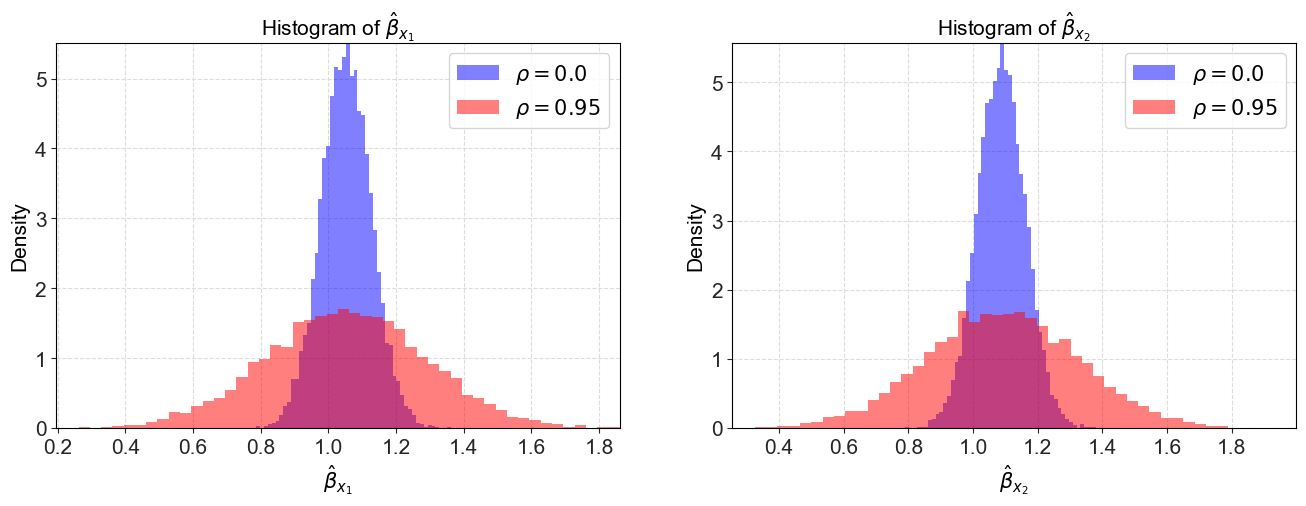

In [32]:
"""
Plot histogram
"""

fig,ax = plt.subplots(1, 2, figsize=(16, 5))

ax1 = ax[0]

ax1.hist(theta_uncorr[:, 1], color="blue", alpha=0.5, bins=50, density=True, label="$\\rho = 0.0$")
ax1.hist(theta_corr[:, 1], color="red", alpha=0.5, bins=50, density=True, label="$\\rho = 0.95$")

ax1.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax1.set_ylabel('Density', size=15)
ax1.set_title('Histogram of $\\hat{\\beta}_{x_1}$', size=15);
ax1.legend();

ax2 = ax[1]

ax2.hist(theta_uncorr[:, 2], color="blue", alpha=0.5, bins=50, density=True, label="$\\rho = 0.0$")
ax2.hist(theta_corr[:, 2], color="red", alpha=0.5, bins=50, density=True, label="$\\rho = 0.95$")

ax2.set_xlabel('$\\hat{\\beta}_{x_2}$', size=15)
ax2.set_ylabel('Density', size=15)
ax2.set_title('Histogram of $\\hat{\\beta}_{x_2}$', size=15);
ax2.legend();

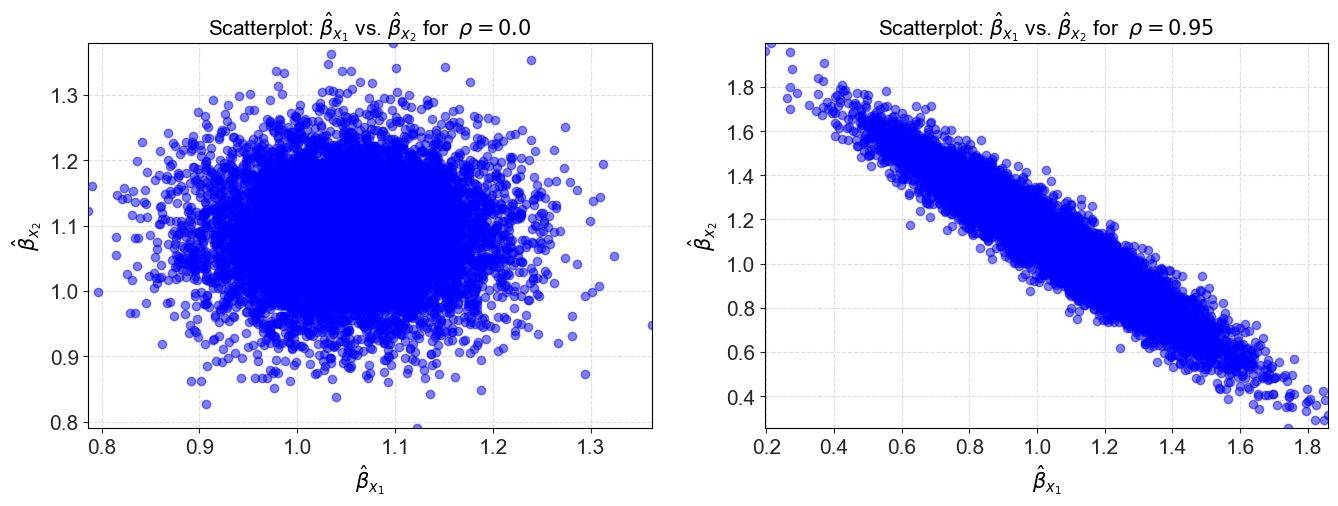

In [33]:
"""
Plot scatter plot
"""

fig,ax = plt.subplots(1, 2, figsize=(16, 5))

ax1 = ax[0]

ax1.scatter(theta_uncorr[:, 1], theta_uncorr[:, 2], color="blue", alpha=0.5)

ax1.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax1.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax1.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.0$', size=15)

ax2 = ax[1]

ax2.scatter(theta_corr[:, 1], theta_corr[:, 2], color="blue", alpha=0.5)

ax2.set_xlabel('$\\hat{\\beta}_{x_1}$', size=15)
ax2.set_ylabel('$\\hat{\\beta}_{x_2}$', size=15)
ax2.set_title('Scatterplot: $\\hat{\\beta}_{x_1}$ vs. $\\hat{\\beta}_{x_2}$ for  $\\rho = 0.95$', size=15);

# Principal components

Assume that $\mathbf{X}$ is a $T \times N$ matrix 

$$
\mathbf{X} =  \begin{bmatrix} x_{11} & x_{12} & \dots & x_{1N} \\ 
x_{21} & x_{22} & \dots & x_{2N} \\
\vdots & \vdots & \dots & \vdots \\
x_{T1} & x_{T2} & \dots & x_{TN}
\end{bmatrix}
$$

We define the <mark>principal components</mark> to be linear combinations of the columns of $\mathbf{X}$ where the weights are chosen such that 

* the principal componens are uncorrelated with each other 
* the first principal component explains the most variation and the second component explains the greatest amount of the remaining variation, etc. 

We will measure variation using the covariance matrix (or the correlation matrix) $\boldsymbol{\Sigma}$. Let $\boldsymbol{\Lambda}$ denote the diagional matrix of eigenvalues of $\boldsymbol{\Sigma}$ (largest to smallest) and let $\mathbf{W}$ be the matrix of eigenvectors. 

The matrix of principal components of $\boldsymbol{\Sigma}$ is a $T \times N$ matrix   $\mathbf{P}$

$$
\mathbf{P} = \mathbf{X}\mathbf{W}
$$

The $m$'th principal component will correspond to the $m$'th column in $\mathbf{P}$. 

__Covariance of principal components__

It is possible to show that the covariance of the principal components are given by

$$
\frac{1}{T}\mathbf{P}^\top \mathbf{P} = \boldsymbol{\Lambda}
$$

Thus, 

* The covariance matrix is diagonal such that the correlation between the principal components are zero
* The variance of the $m$'th principal component is $\lambda_m$

__Total variance__

The total variance in $\mathbf{X}$ is the sum of the eigenvalues of $\boldsymbol{\Sigma}$, $\lambda_1 + \lambda_2 + \dots + \lambda_N$. 

The proportion of variation explained by the $m$'th principal component is then 

$$
\frac{\lambda_m}{\lambda_1 + \lambda_2 + \dots + \lambda_N}
$$


## Example with bivariate normal

Consider a bivariate normal distribution 

$$
\begin{bmatrix} x \\ y \end{bmatrix}  \sim MN \left(\begin{bmatrix} 0 \\ 0 \end{bmatrix} , \begin{bmatrix} 1 & 0.5\\ 0.5 & 1 \end{bmatrix}\right)
$$

The eigenvalues of the covariance matrix $\boldsymbol{\Sigma} = \begin{bmatrix} 1 & 0.5\\ 0.5 & 1 \end{bmatrix}$ are $1.5$ and $0.5$. Thus, the first principal component will explain $75\%$ of the variation. 

We want to use Python to simulate 500 observations and plot the simulated data together with the eigenvectors. 

In [34]:
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.5],
                [0.5, 1.0]])

data = np.random.multivariate_normal(mean=mean, cov = cov, size=500)

eig_ouput = np.linalg.eig(cov)
eig_ouput

EigResult(eigenvalues=array([1.5, 0.5]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

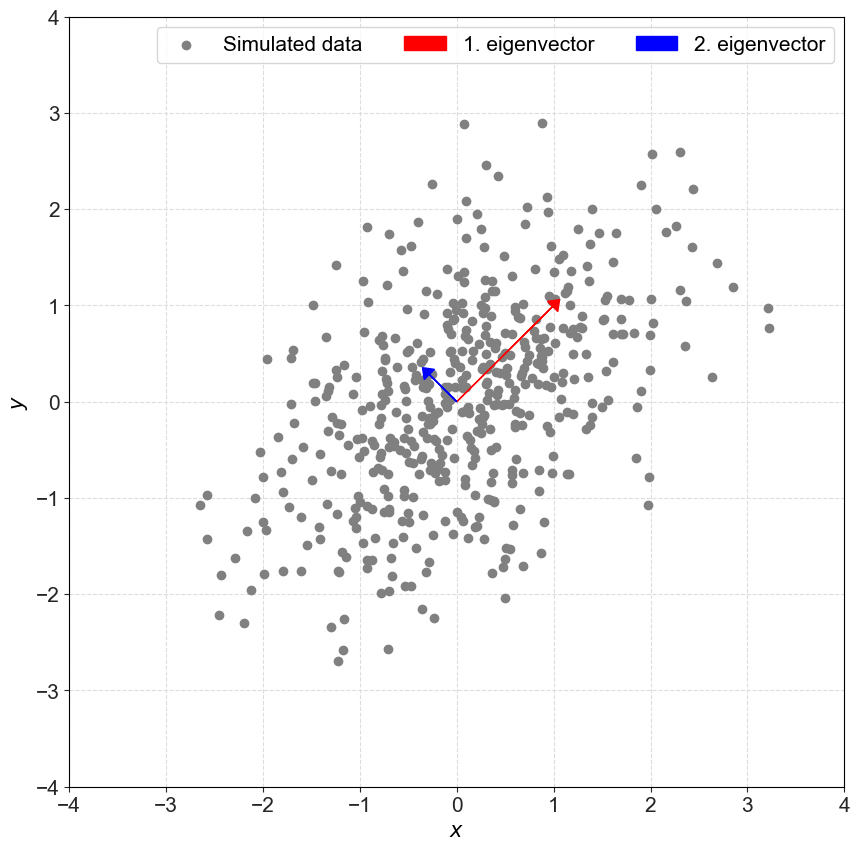

In [35]:
l1 = eig_ouput[0][0]
l2 = eig_ouput[0][1]

fig, ax = plt.subplots(figsize=(10,10))

f = plt.scatter(data[:, 0],data[:, 1], color='gray', label='Simulated data') 
arrow1 = ax.arrow(0, 0, l1*eig_ouput[1][0, 0], l1*eig_ouput[1][1, 0], head_width=0.15, head_length=0.1, fc='red',
         ec='red', length_includes_head=True, label="First eigenvector")
arrow2 = ax.arrow(0, 0, l2*eig_ouput[1][0, 1], l2*eig_ouput[1][1, 1], head_width=0.15, head_length=0.1, fc='blue',
         ec='blue', length_includes_head=True, label="Second eigenvector")

plt.xlim([-4, 4])
plt.ylim([-4, 4])

plt.xlabel('$x$')
plt.ylabel('$y$')

ax.legend([f, arrow1, arrow2], ['Simulated data', '1. eigenvector', '2. eigenvector'], ncol=3);

In [36]:
p_data = data @ eig_ouput[1]

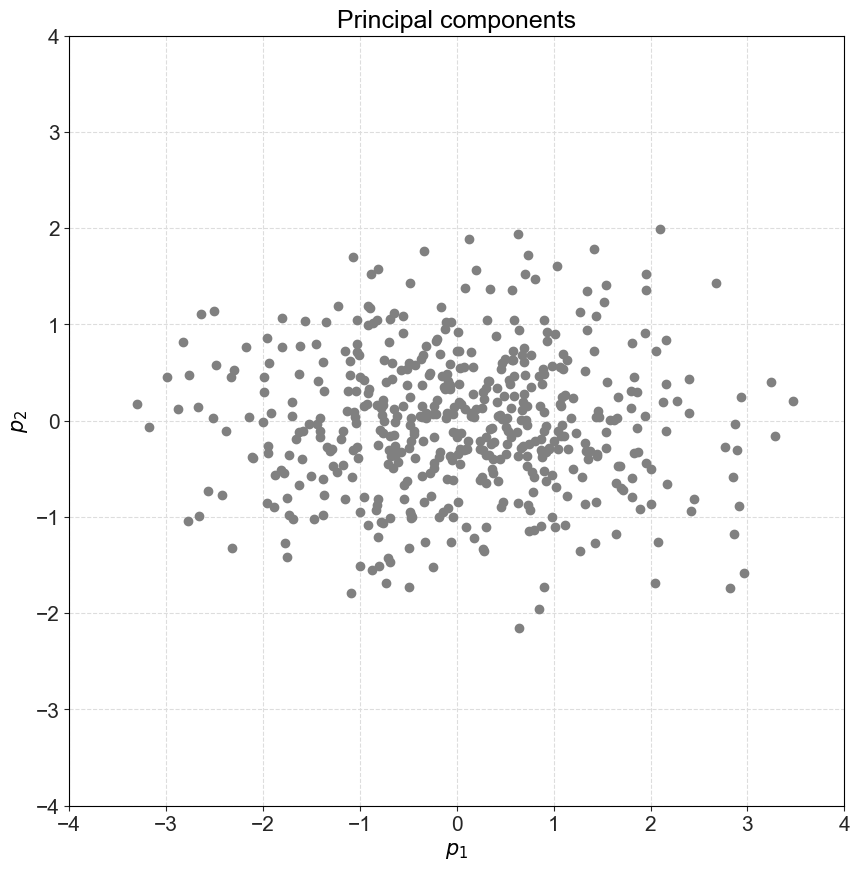

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

f = plt.scatter(p_data[:, 0],p_data[:, 1], color='gray', label='Simulated data') 


plt.xlim([-4, 4])
plt.ylim([-4, 4])

plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('Principal components');

# Revisiting the portfolio construction example

Based on what we have learned so far, we can cast the allocation decision of an investor in matrix notation. Let 

$$
\begin{equation*}
\boldsymbol{\mu} = \begin{bmatrix}
0.02 \\ 0.05 \\ 0.06 \\ 0.08
\end{bmatrix}, \; 
\boldsymbol{\sigma} =  \begin{bmatrix}
0.05 \\ 0.1 \\ 0.15 \\ 0.2
\end{bmatrix}, \;
\mathbf{C} = \begin{bmatrix}
1 &	0.85 & 0.5	& 0.45 \\
0.85 &	1 &	0.5	 & 0.45 \\
0.5	& 0.5 &	1&	0.7 \\
0.45&	0.45&	0.7 &	1
\end{bmatrix},
\end{equation*}
$$

be the mean vector, std. deviation vector, and correlation matrix of returns, respectively. 

In [38]:
"""
Define inputs
"""

mu = np.array([0.02, 0.05, 0.06, 0.08])

sigma = np.array([0.05, 0.1, 0.15, 0.2])

C = np.array([[1, 0.85, 0.50, 0.45], 
              [0.85, 1, 0.50, 0.45], 
              [0.50, 0.50, 1, 0.70], 
              [0.45, 0.45, 0.70, 1]])


How do we obtain the covariance matrix from the standard deviation and correlations? We know that the covariance is given by $\sigma_{X,Y} = \sigma_X \sigma_Y \rho_{X, Y}$, but we want a fast of doing the computations. 

We easily calculate the covariance matrix using either 

In [39]:
D = np.diag(sigma)
Sigma = np.matmul(D, np.matmul(C, D))
Sigma

array([[0.0025 , 0.00425, 0.00375, 0.0045 ],
       [0.00425, 0.01   , 0.0075 , 0.009  ],
       [0.00375, 0.0075 , 0.0225 , 0.021  ],
       [0.0045 , 0.009  , 0.021  , 0.04   ]])

or 

In [40]:
Sigma = np.outer(sigma, sigma) * C
Sigma

array([[0.0025 , 0.00425, 0.00375, 0.0045 ],
       [0.00425, 0.01   , 0.0075 , 0.009  ],
       [0.00375, 0.0075 , 0.0225 , 0.021  ],
       [0.0045 , 0.009  , 0.021  , 0.04   ]])

We want to define two function that calculate the portfolio mean and portfolio variance

In [41]:
def portfolio_mean(w: np.ndarray, mu: np.ndarray): 
    
    """
    Calculates the portfolio mean
    
    Parameters
    ----------
    w: np.ndarray
        Portfolio weights. 
    mu: np.ndarray
        Asset expected returns. 
        
    Returns
    -------
    float
        Portfolio expected return. 
    
    """
    
    return np.matmul(w, mu)

def portfolio_variance(w: np.ndarray, Sigma: np.ndarray): 
    
    """
    Calculates the portfolio mean

    Parameters
    ----------
    w: np.ndarray
        Portfolio weights. 
    Sigma: np.ndarray
        Asset covariance matrix. 

    Returns
    -------
    float
        Portfolio variance. 

    """

    return np.matmul(w, np.matmul(Sigma, w))

In [42]:
"""
Calculate portfolio mean and std. for equal weighted portfolio
"""

w = np.repeat(1.0 / len(mu), len(mu))

# portfolio expected value
portfolio_mean(w, mu)

np.float64(0.052500000000000005)

In [43]:
# portfolio std. 
np.sqrt(portfolio_variance(w, Sigma))

np.float64(0.10458250331675945)

Later in the course, we will learn how to minimize portfolio variance for a given return target

$$
 \min_\mathbf{w} \mathbf{w}^\top \Sigma \mathbf{w} \; s.t. \mathbf{w}^\top \boldsymbol{\mu} = c  
$$

where $\Sigma$ is the covariance matrix of returns. 

# References

## Articles


## Books